# Neural Networks (Deep Learning)

- Deep learning algorithms are often tailored very carefully to a specific use case.
- Simple methods of deep learning.
    - Multilayer perceptrons (MLPs) / (vanila) feed-forward neural networks / neural networks.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mglearn
%matplotlib inline
from sklearn.model_selection import train_test_split

___

## The Neural Networks Model

- Generalization of linear models that perform multiple stages of processing to come to a decision.
- $ŷ = w[0] * x[0] + w[1] * x[1] + ... + w[p] * x[p] + b$
    - $x[0]$ to $x[p]$ are input features.
    - $w[0]$ to $w[p]$ are weights or learned coefficients.

Visualization of logistic regression, where input features and predictions are
shown as nodes, and the coefficients are connections between the nodes

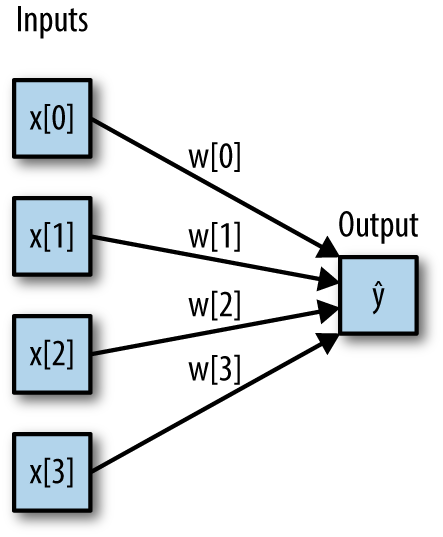

In an MLP this process of computing weighted sums is __repeated multiple times__, first
computing hidden units that represent an intermediate processing step, which are
again combined using weighted sums to yield the final result

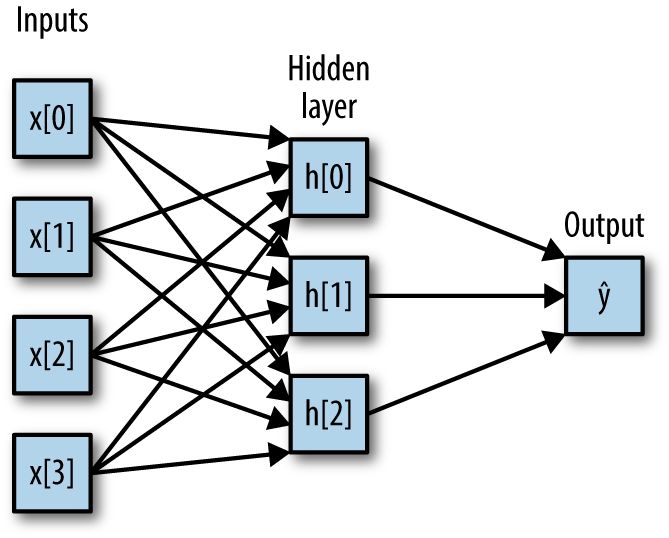

- Has a lot more cofficients (weights) to learn.
- After computing a weighted sum for each hidden unit, a nonlinear function is applied to the result—usually the rectifying nonlinearity (also known as rectified linear unit or relu) or the tangens hyperbolicus (tanh). The result of this function is then used in the weighted sum that computes the output, $ŷ$.
- The relu cuts off values below zero, while tanh saturates to –1 for low input values and +1 for high input values. Either nonlinear function allows the neural network to learn much more complicated functions than a linear model could.
- computations. An important parameter that needs to be set by the user is the number of nodes in the hidden layer. This can be as small as 10 for very small or simple datasets and as big as 10,000 for very complex data.


Multilayer perceptron with two hidden layers:

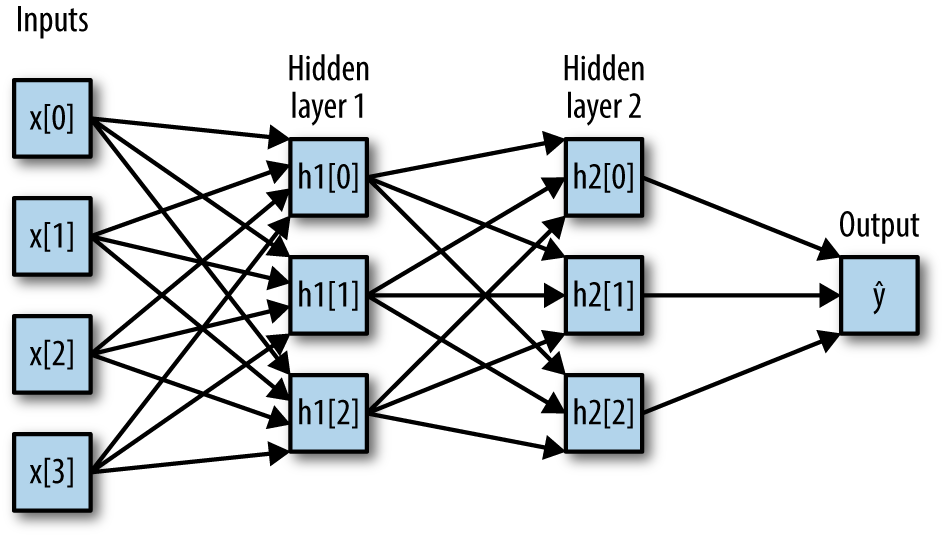

## Tuning Neural Networks

Text(0, 0.5, 'Feature 1')

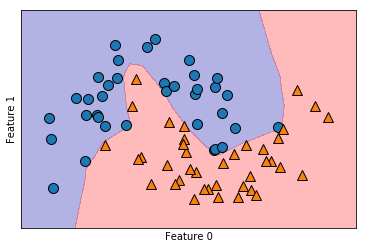

In [5]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

mlp = MLPClassifier(solver='lbfgs', random_state=0).fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

By default, the MLP uses 100 hidden nodes, which is quite a lot for this small dataset.
We can reduce the number (which reduces the complexity of the model) and still get
a good result

Text(0, 0.5, 'Feature 1')

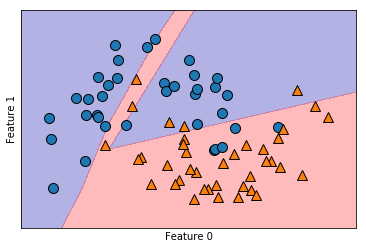

In [6]:
mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Text(0, 0.5, 'Feature 1')

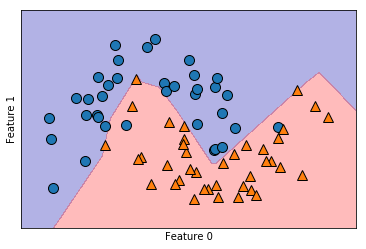

In [7]:
# using two hidden layers, with 10 units each
mlp = MLPClassifier(solver='lbfgs', random_state=0,
hidden_layer_sizes=[10, 10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Text(0, 0.5, 'Feature 1')

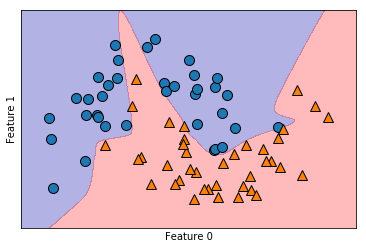

In [8]:
# using two hidden layers, with 10 units each, now with tanh nonlinearity
mlp = MLPClassifier(solver='lbfgs', activation='tanh',
random_state=0, hidden_layer_sizes=[10, 10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Finally, we can also control the complexity of a neural network by using an l2 penalty
to shrink the weights toward zero, as we did in ridge regression and the linear classifiers.
The parameter for this in the MLPClassifier is alpha (as in the linear regression
models), and it’s set to a very low value (little regularization) by default.

In [11]:
# fig, axes = plt.subplots(2, 4, figsize=(20, 8))
# for axx, n_hidden_nodes in zip(axes, [10, 100]):
#     for ax, alpha in zip(axx, [0.0001, 0.01, 0.1, 1]):
#         mlp = MLPClassifier(solver='lbfgs', random_state=0,
#                             hidden_layer_sizes=[n_hidden_nodes, n_hidden_nodes],
#                             alpha=alpha)
#     mlp.fit(X_train, y_train)
#     mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
#     mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)
#     ax.set_title("n_hidden=[{}, {}]\nalpha={:.4f}".format(
#                     n_hidden_nodes, n_hidden_nodes, alpha))